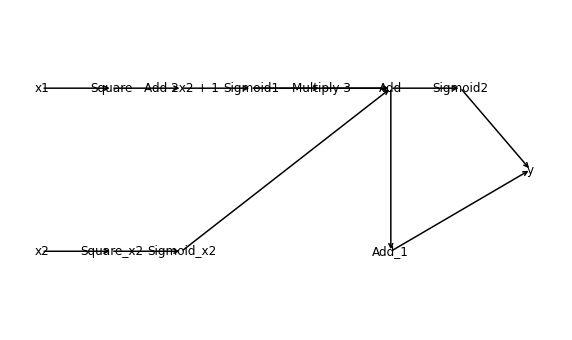

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))

# 定义节点位置
nodes = {
    'x1': (1, 5),
    'Square': (3, 5),
    'Add 2x2 + 1': (5, 5),
    'Sigmoid1': (7, 5),
    'Multiply 3': (9, 5),
    'Add': (11, 5),
    'Sigmoid2': (13, 5),
    'x2': (1, 3),
    'Square_x2': (3, 3),
    'Sigmoid_x2': (5, 3),
    'Add_1': (11, 3),
    'y': (15, 4)
}

# 绘制节点
for label, (x, y) in nodes.items():
    ax.text(x, y, label, ha='center', va='center', fontsize=12)

# 绘制箭头
arrows = [
    ('x1', 'Square'), ('Square', 'Add 2x2 + 1'), ('Add 2x2 + 1', 'Sigmoid1'),
    ('Sigmoid1', 'Multiply 3'), ('Multiply 3', 'Add'), ('Add', 'Sigmoid2'),
    ('x2', 'Square_x2'), ('Square_x2', 'Sigmoid_x2'), ('Sigmoid_x2', 'Add'),
    ('Sigmoid1', 'Add'), ('Add', 'Add_1'), ('Add_1', 'y'), ('Sigmoid2', 'y')
]

for start, end in arrows:
    ax.annotate("", xy=nodes[end], xytext=nodes[start],
                arrowprops=dict(arrowstyle="->", lw=1.5))

# 设置图形属性
ax.set_xlim(0, 16)
ax.set_ylim(2, 6)
ax.axis('off')  # 关闭坐标轴

plt.show()

In [34]:
import torch
import torch.nn.functional as F

# 定义变量
x1 = torch.tensor(0., requires_grad=True)
x2 = torch.tensor(1., requires_grad=True)

# 定义函数
y = F.sigmoid(3 * F.sigmoid(x1**2 + 2 * x2 + 1)) + F.sigmoid(x1**2 + 2 * x2 + 1) + 1

# 假设这里是计算图中的节点，这里简化为只包含y
node_dict = {'y': y}
# 假设这里是变量，这里简化为只包含x1和x2
var_dict = {'x1': x1, 'x2': x2}

for node_name in node_dict:
    for var_name in var_dict:
        var = var_dict[var_name]
        if var.grad is not None:
            var.grad.zero_()
        else:
            var.grad = torch.tensor(0.0)

        node = node_dict[node_name]
        node.backward(retain_graph=True)
        print(f"{node_name}对{var_name}的导数:", var.grad)

y对x1的导数: tensor(0.)
y对x2的导数: tensor(0.1043)
